<a href="https://colab.research.google.com/github/KaramSahoo/Expression_detection/blob/main/Expressions_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!unzip /content/gdrive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/happy/PrivateTest_21876158.jpg  
  inflating: test/happy/PrivateTest_22024521.jpg  
  inflating: test/happy/PrivateTest_22108748.jpg  
  inflating: test/happy/PrivateTest_22154496.jpg  
  inflating: test/happy/PrivateTest_2260082.jpg  
  inflating: test/happy/PrivateTest_22689070.jpg  
  inflating: test/happy/PrivateTest_22929697.jpg  
  inflating: test/happy/PrivateTest_22938435.jpg  
  inflating: test/happy/PrivateTest_22979298.jpg  
  inflating: test/happy/PrivateTest_2309763.jpg  
  inflating: test/happy/PrivateTest_23250597.jpg  
  inflating: test/happy/PrivateTest_23282756.jpg  
  inflating: test/happy/PrivateTest_23344981.jpg  
  inflating: test/happy/PrivateTest_23400117.jpg  
  inflating: test/happy/PrivateTest_2352334.jpg  
  inflating: test/happy/PrivateTest_23574753.jpg  
  inflating: test/happy/PrivateTest_23578691.jpg  
  inflating: test/happy/PrivateTest_23631554.jpg  
  inflating: test/happy/PrivateTes

In [4]:
img_array = cv2.imread("train/0/Training_10315441.jpg")

In [5]:
img_array.shape

(48, 48, 3)

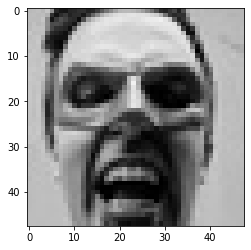

In [6]:
plt.imshow(img_array)

In [7]:
Datadirectory = "train/"

In [8]:
classes = ["0", "1", "2", "3", "4", "5", "6"]

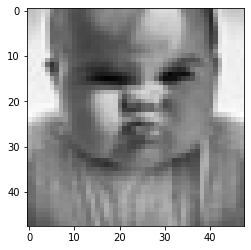

In [9]:
for category in classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

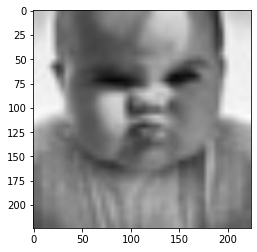

In [10]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
training_data = []

def create_training_data():
  for category in classes:
    path = os.path.join(Datadirectory, category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [13]:
create_training_data()

In [14]:
print(len(training_data))

28709


In [15]:
random.shuffle(training_data)

In [16]:
X = []
y = []

for features, labels in training_data:
  X.append(features)
  y.append(labels)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [17]:
X.shape

(28709, 224, 224, 3)

In [ ]:
X = X/255.0